In [1]:
import getdist

In [2]:
from getdist.mcsamples import loadMCSamples

In [3]:
samples = loadMCSamples('/scratch/users/delon/chains/DESIY1_BBN_ThetaS_vary_mnu')

In [4]:
from getdist import plots, MCSamples

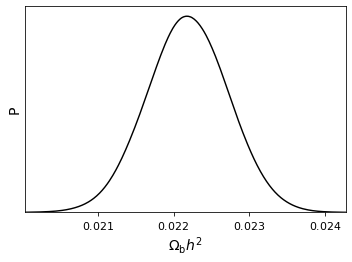

In [5]:
%matplotlib inline
g = plots.get_single_plotter(width_inch=5)
g.plot_1d(samples, 'ombh2', normalized=True, 
)

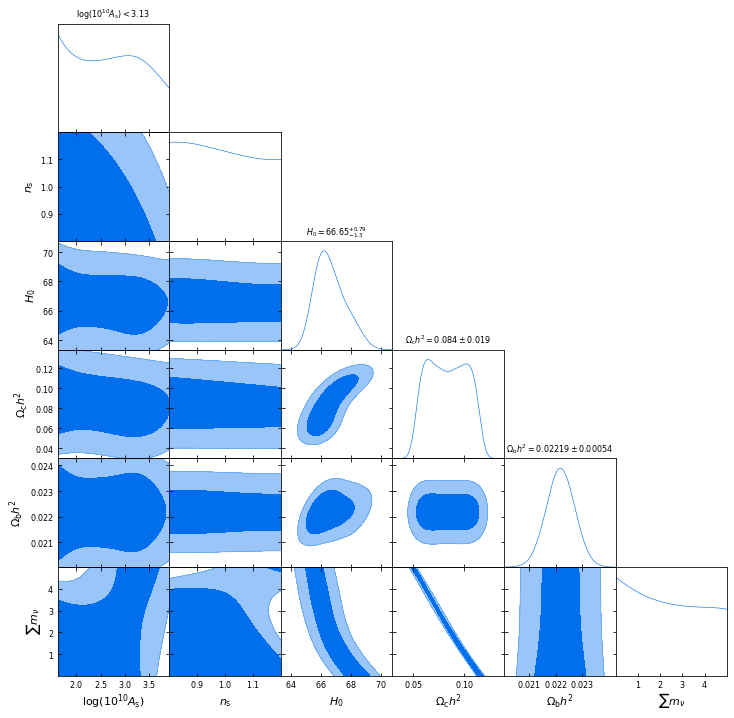

In [26]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples, ['logA','ns','H0','omch2', 'ombh2','mnu'],filled=True, title_limit=1)
# g.triangle_plot(samples, ['logA','ns','H0','omch2', 'ombh2'],filled=True)

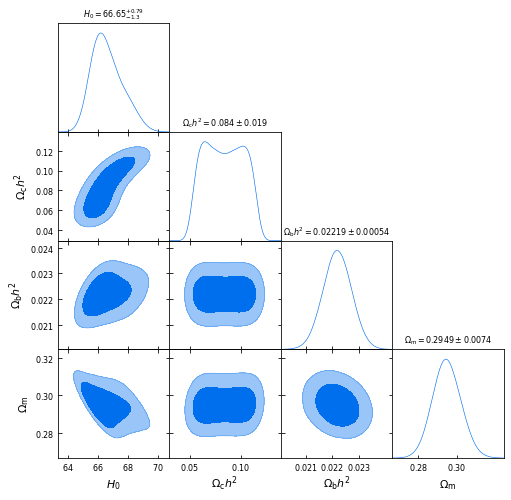

In [7]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples, ['H0','omch2', 'ombh2', 'omegam'],filled=True, title_limit=1)

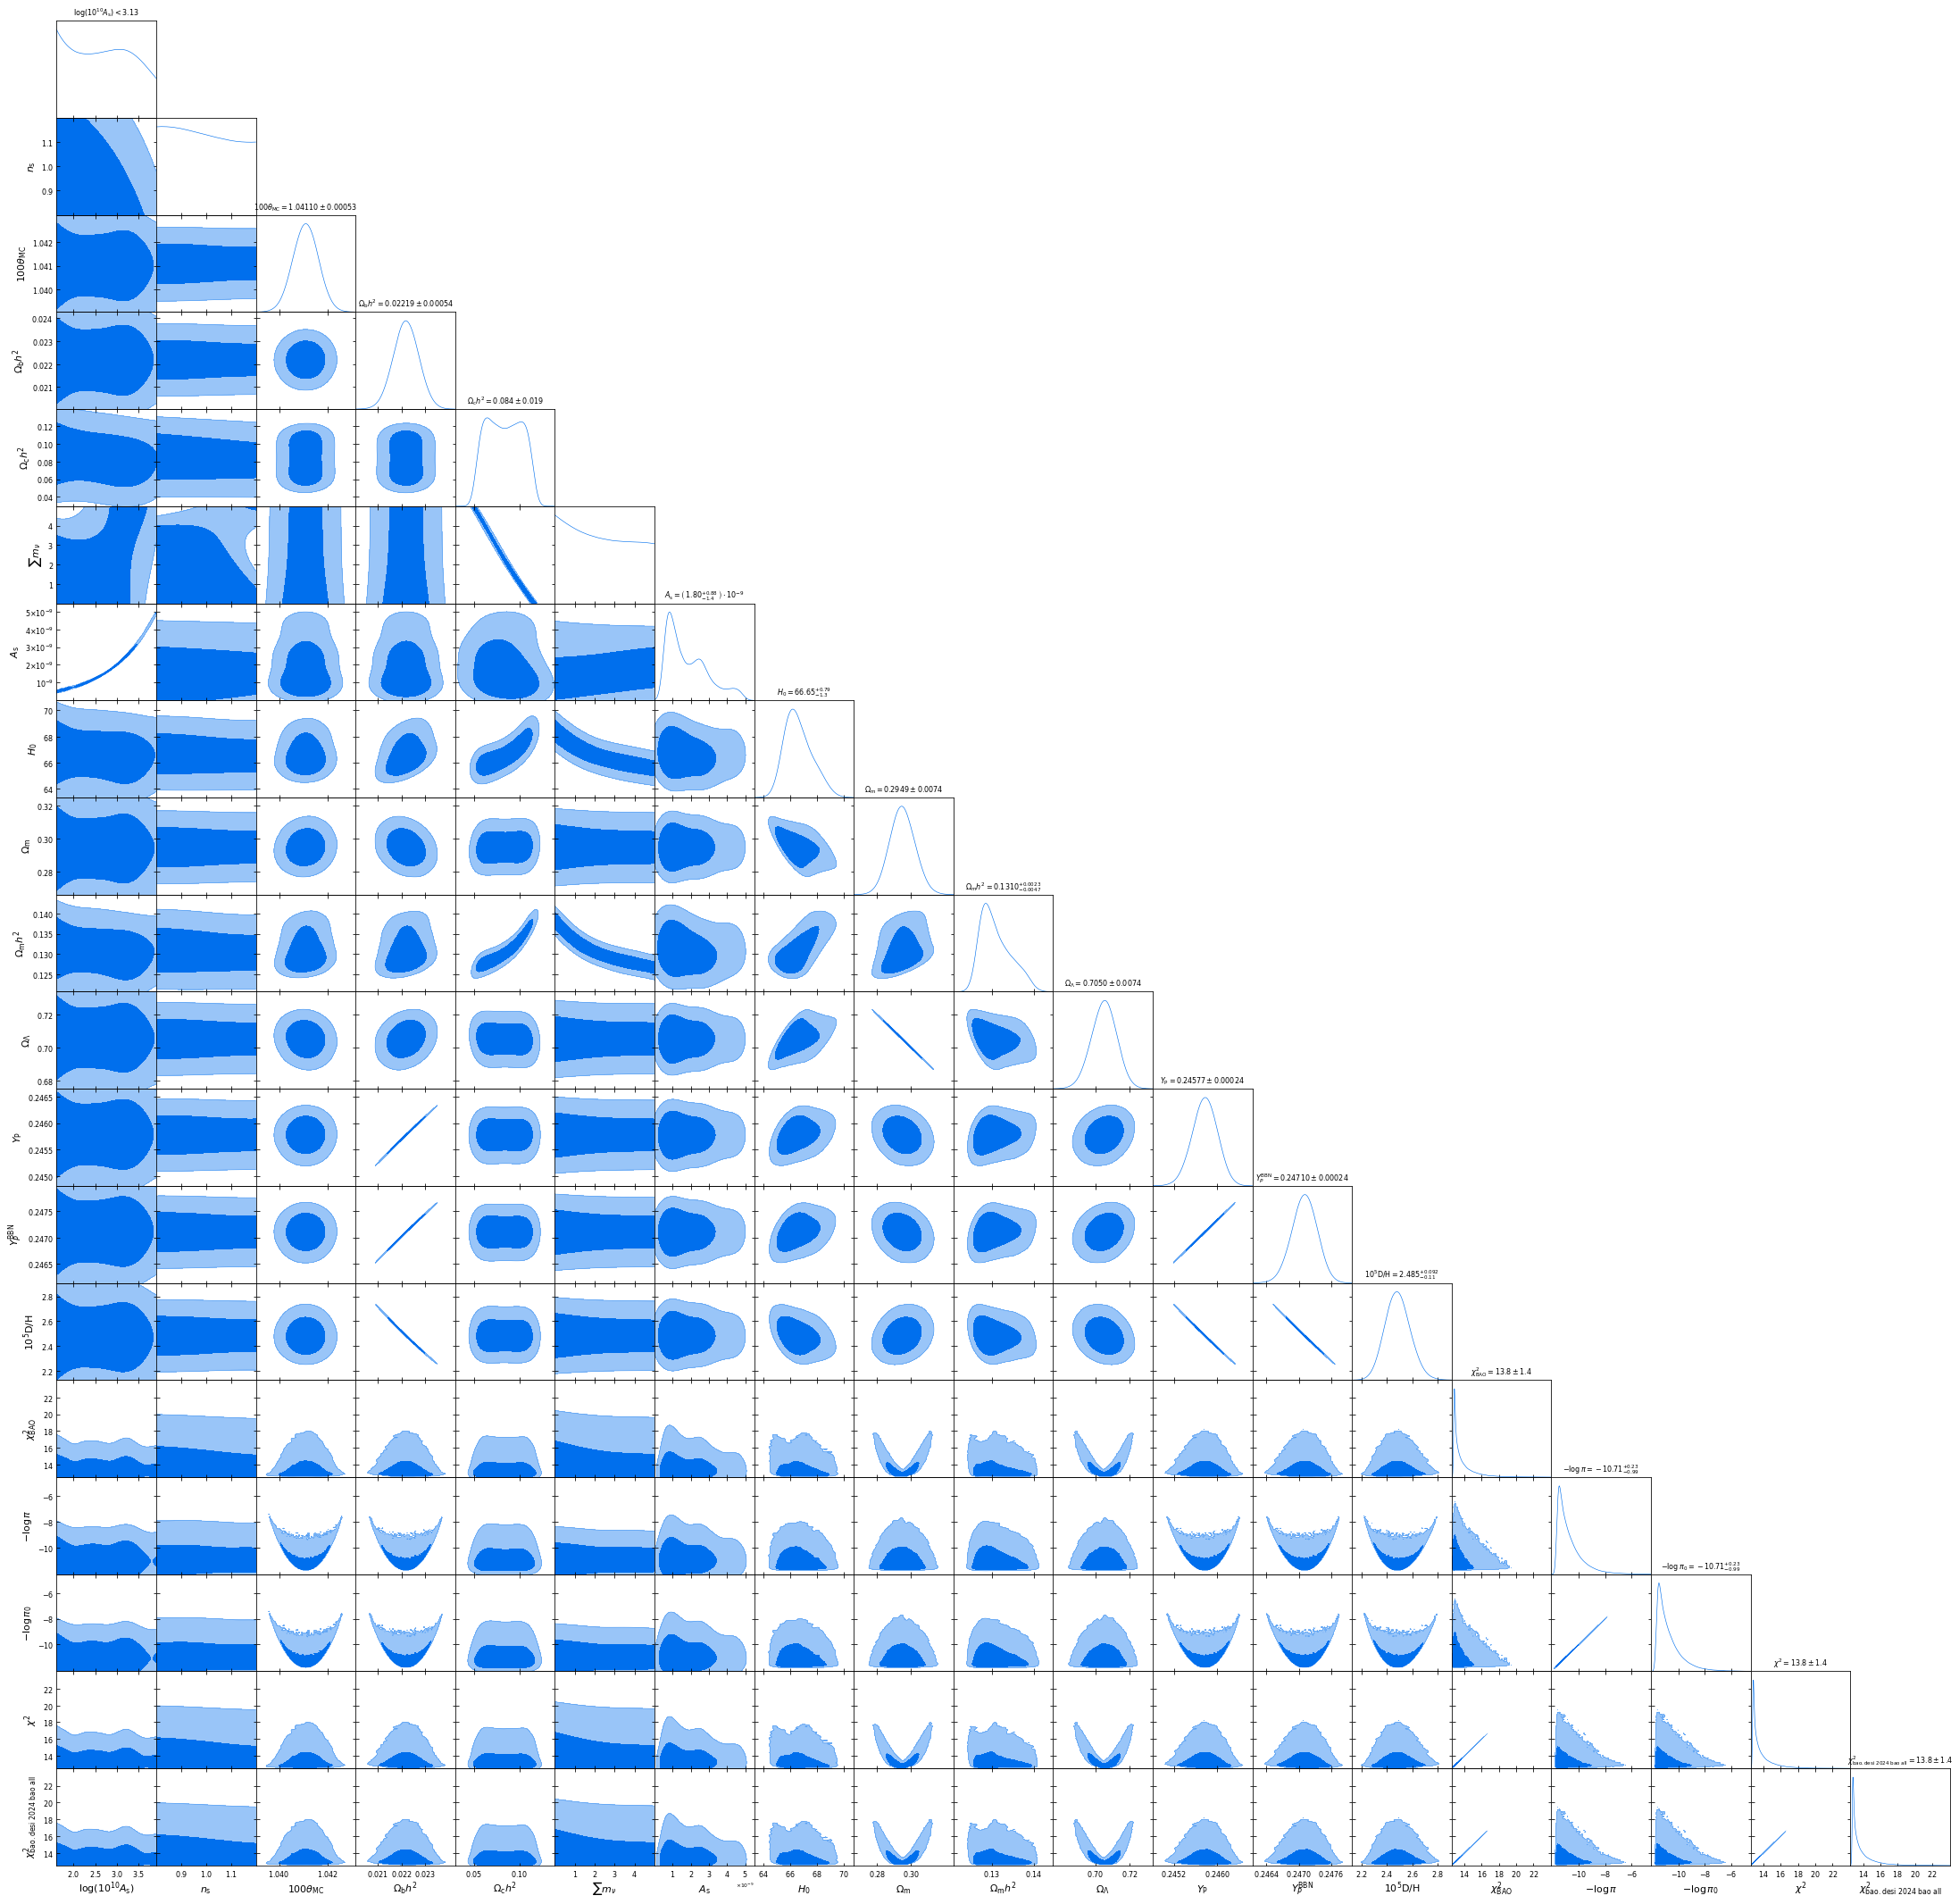

In [8]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples,filled=True, title_limit=1)

In [9]:
['10^9 As', 'ns', 'H0', 'w0', 'ombh2', 'omch2', 'nu_mass_ev']

['10^9 As', 'ns', 'H0', 'w0', 'ombh2', 'omch2', 'nu_mass_ev']

In [10]:
print(samples.paramNames)

logA	\log(10^{10} A_\mathrm{s})
ns	n_\mathrm{s}
theta_MC_100	100\theta_\mathrm{MC}
ombh2	\Omega_\mathrm{b} h^2
omch2	\Omega_\mathrm{c} h^2
mnu	\sum m_\nu
As*	A_\mathrm{s}
H0*	H_0
omegam*	\Omega_\mathrm{m}
omegamh2*	\Omega_\mathrm{m} h^2
omega_de*	\Omega_\Lambda
YHe*	Y_\mathrm{P}
Y_p*	Y_P^\mathrm{BBN}
DHBBN*	10^5 \mathrm{D}/\mathrm{H}
chi2__BAO*	\chi^2_\mathrm{BAO}
minuslogprior*	-\log\pi
minuslogprior__0*	-\log\pi_\mathrm{0}
chi2*	\chi^2
chi2__bao.desi_2024_bao_all*	\chi^2_\mathrm{bao.desi\ 2024\ bao\ all}



In [27]:
covmat = samples.getCov(pars=(7,3,4))

In [28]:
from getdist.gaussian_mixtures import GaussianND
covariance = covmat
mean = samples.mean(paramVec=(7,3,4))
gauss=GaussianND(mean, covariance, names=[ 'H0', 'ombh2', 'omch2'], label='Gaussian Mixture')

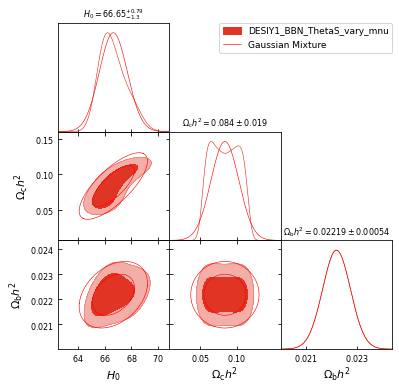

In [36]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples, gauss], ['H0','omch2', 'ombh2'],
                filled=[True, False], facecolor='white', title_limit=1)

In [34]:
samples.getTable(limit=1).tablePNG(filename='/home/users/delon/aemulusnu_massfunction/4.fisher_forecast/DESI-Y1-mnu-chain/table.png')

'/home/users/delon/aemulusnu_massfunction/4.fisher_forecast/DESI-Y1-mnu-chain/table.png'

In [35]:
import pickle
with open('DESI_y1_BAO_BBN_thetas_nuCDM_cov.pkl', 'wb') as file:
    pickle.dump(covariance, file)

In [18]:
import re

def parse_minimum_file(file_path):
    bf_dict = {}
    neg_log_like = -1
    chi_sq = -1
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    neg_log_like = float(lines[0].split()[-1])
    chi_sq       = float(lines[1].split()[-1])
    
    for line in lines[2:]: 
        parts = re.split(r'\s+', line.strip(), maxsplit=3)
        if len(parts) == 4:
            key = parts[2]
            bf_dict[key] = {
                'bf_value': float(parts[1]),
                'latex': parts[3]
            }
    
    return neg_log_like, chi_sq, bf_dict

In [23]:
_,_,best_fits = parse_minimum_file('/scratch/users/delon/chains/DESIY1_BBN_ThetaS_vary_mnu.minimum')

In [24]:
best_fits['H0']

{'bf_value': 68.77185489, 'latex': 'H_0'}

In [25]:
best_fits['omegam']

{'bf_value': 0.2942169332, 'latex': '\\Omega_\\mathrm{m}'}